Importing the dependencies

In [107]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

Data Collection and Processing

In [108]:
#loading the csv data to a Pandas Dataframe

heart_data = pd.read_csv('../data/heart_disease_data.csv')

#print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
#print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
510,48,1,1,136,190,0,1,145,1,1.1,1,0,2,0
511,65,1,0,135,210,0,1,135,0,2.1,1,0,3,0
512,62,1,0,128,220,0,1,140,0,1.2,1,0,2,0
513,58,1,0,125,200,0,0,130,1,1.0,1,0,3,0
514,49,1,1,138,200,0,0,145,1,1.5,1,1,2,0


In [110]:
#number of rows and columns in the dataset
heart_data.shape

(515, 14)

In [111]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       515 non-null    int64  
 1   sex       515 non-null    int64  
 2   cp        515 non-null    int64  
 3   trestbps  515 non-null    int64  
 4   chol      515 non-null    int64  
 5   fbs       515 non-null    int64  
 6   restecg   515 non-null    int64  
 7   thalach   515 non-null    int64  
 8   exang     515 non-null    int64  
 9   oldpeak   515 non-null    float64
 10  slope     515 non-null    int64  
 11  ca        515 non-null    int64  
 12  thal      515 non-null    int64  
 13  target    515 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 56.5 KB


In [112]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Handling missing values by Imputation

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

Central Tendencies:

1. Mean -
    Average of the data
2. Median -
    Middle value after arranging the data set in ascending order
3. Mode -
    The number which is more frequency i.e. the number which is present in multiple.

C:\Users\navne\AppData\Local\Temp\ipykernel_11572\117446859.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.trestbps)


<Axes: xlabel='trestbps', ylabel='Density'>

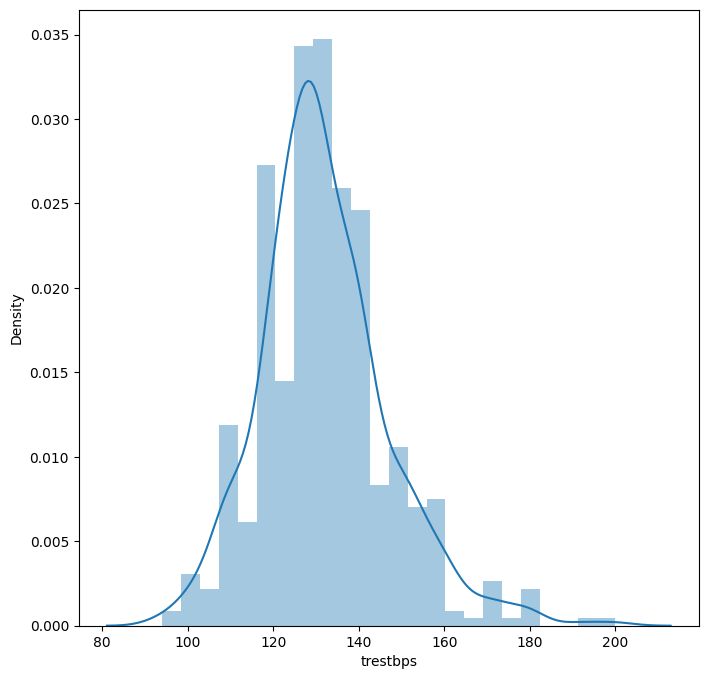

In [114]:
#analyse the distribution of data in trestbps

fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.trestbps)

Replace the missing values with Median values (for scew distribution, if there is normal distribution then we need to replace with Mean values

In [115]:
heart_data['trestbps'].fillna(heart_data['trestbps'].median(),inplace=True)

In [116]:
#checking for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dropping Method:
dont use in predictive models as it will drop all the rows with missing values in column.

Syntax:

trestbps_heart_data = trestbps_heart_data.dropna(how='any')

In [117]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,55.287379,0.710680,0.743689,131.957282,235.180583,0.118447,0.524272,147.095146,0.401942,1.280000,1.355340,0.699029,2.442718,0.320388
std,8.288977,0.453888,0.982500,14.993712,45.977710,0.323450,0.522726,19.306374,0.490767,1.076314,0.564813,0.917141,0.596782,0.467080
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,122.000000,204.000000,0.000000,0.000000,135.000000,0.000000,0.300000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,0.000000,130.000000,225.000000,0.000000,1.000000,146.000000,0.000000,1.200000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,257.000000,0.000000,1.000000,160.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [118]:
#checking the distribution of target variable

heart_data['target'].value_counts()

0    350
1    165
Name: target, dtype: int64

1 -> Defective Heart
0 -> Healthy Heart

Splitting the feautures and target:

In [119]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
510   48    1   1       136   190    0        1      145      1      1.1   
511   65    1   0       135   210    0        1      135      0      2.1   
512   62    1   0       128   220    0        1      140      0      1.2   
513   58    1   0       125   200    0        0      130      1      1.0   
514   49    1   1       138   200    0        0      145      1      1.5   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [120]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
510    0
511    0
512    0
513    0
514    0
Name: target, Length: 515, dtype: int64


Splitting the data into training data and test data

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [122]:
print(X.shape, X_train.shape, X_test.shape)

(515, 13) (412, 13) (103, 13)


Model Training

Logistic Regression

In [123]:
model = LogisticRegression()

In [124]:
#training the LogisticRegression model with the training data
model.fit(X_train, Y_train)

c:\Users\navne\miniconda3\envs\heart\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

Accuracy Score

In [125]:
#accuracy on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [126]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.8932038834951457


In [127]:
#accuracy on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [128]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.8737864077669902


Building a Predictive System

In [129]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
  print("The person does not have Heart Disease")
else:
  print("The person have Heart Disease")

[0]
The person does not have Heart Disease


c:\Users\navne\miniconda3\envs\heart\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the Trained Model

In [130]:
import pickle

In [131]:
filename = '../model/trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [132]:
#loading the saved model
loaded_model = pickle.load(open('../model/trained_model.sav', 'rb'))

In [133]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
  print("The person does not have Heart Disease")
else:
  print("The person have Heart Disease")

[0]
The person does not have Heart Disease


c:\Users\navne\miniconda3\envs\heart\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
